In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Image Enhancement III: Sharpening

In this task, we will implement unsharp masking in two different forms:
1. Using laplacian as mentioned in lecture notes, i.e. $\dot{f} = \nabla^2 f$
2. Using difference of original and blurred images, i.e. $\dot{f} = f - f_{blur}$

Unsharp masking:
$$
f = f + A\dot{f}
$$

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-qt9cos1g
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.1-cp36-none-any.whl size=2311 sha256=1a98933c723831b30025db36f04d9e6761a30ff050863089f3fa797cea3a5f58
  Stored in directory: /tmp/pip-ephem-wheel-cache-g5nzng83/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-qt9cos1g


In [ ]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=3) # download data for this assignment

Download Complete!


In [ ]:
def unsharp_laplacian(img, laplacian_operator, A=1):
    '''
    Write a program to implement unsharp masking based on laplacian operator.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + laplacian_operator - a 3 x 3 laplacian operator, refer to slides.
    + A - strength parameter of unsharp masking
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    out_img = img + A*cv2.filter2D(img, ddepth=-1, kernel=laplacian_operator)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [ ]:
def unsharp_blur(img, blur_kernel=5, A=1):
    '''
    Write a program to implement unsharp masking based on difference of original and blurred image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + A - strength parameter of unsharp masking
    + blur_kernel - kernel size for gaussian blur operation. 
                    For gaussian kernel use sigma = nearest integer to (blur_kernel/5)
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.GaussianBlur to perform blur operations
    
    Hint:
    + 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    img_blur = cv2.GaussianBlur(img, ksize=(blur_kernel, blur_kernel), sigmaX=np.round(blur_kernel/5), sigmaY=np.round(blur_kernel/5))
    out_img = img + A*(img - img_blur)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Test

---

In [ ]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

car = cv2.imread('data/car_wiki.png', 0)
moon = cv2.imread('data/moon.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------------------
#    Car | A: -2
-------------------------------------


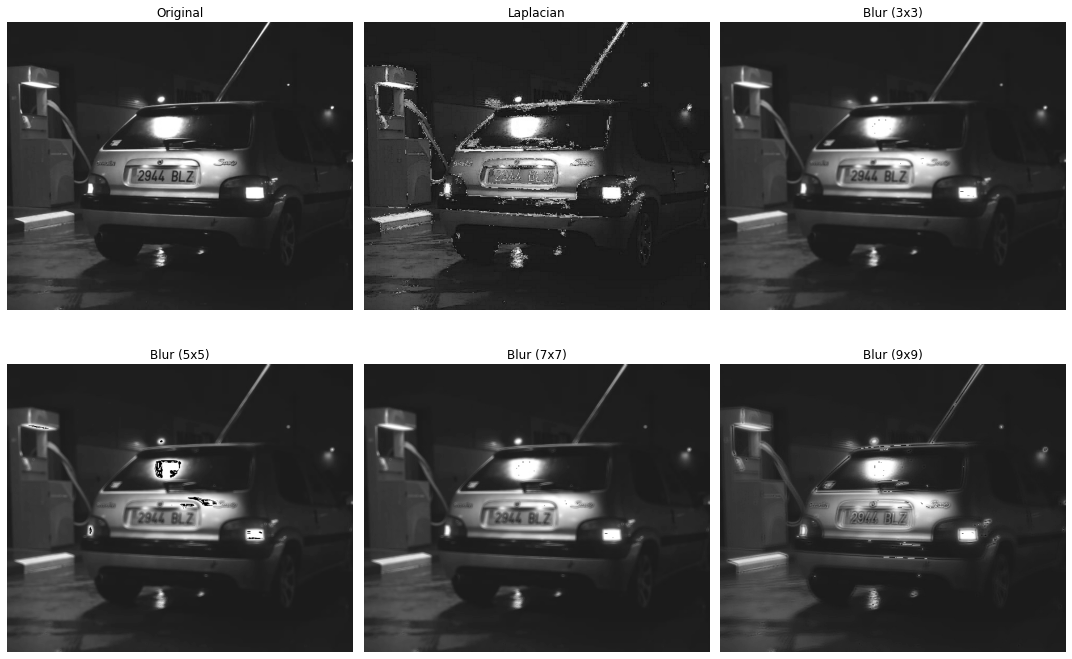


-------------------------------------
#    Car | A: -1
-------------------------------------


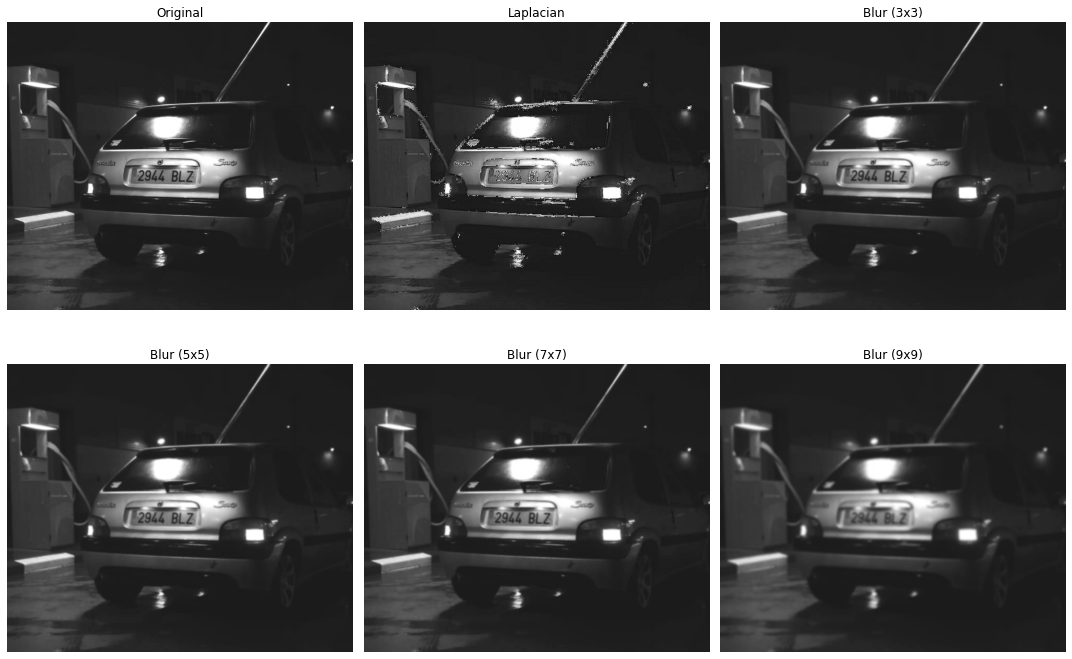


-------------------------------------
#    Car | A: 1
-------------------------------------


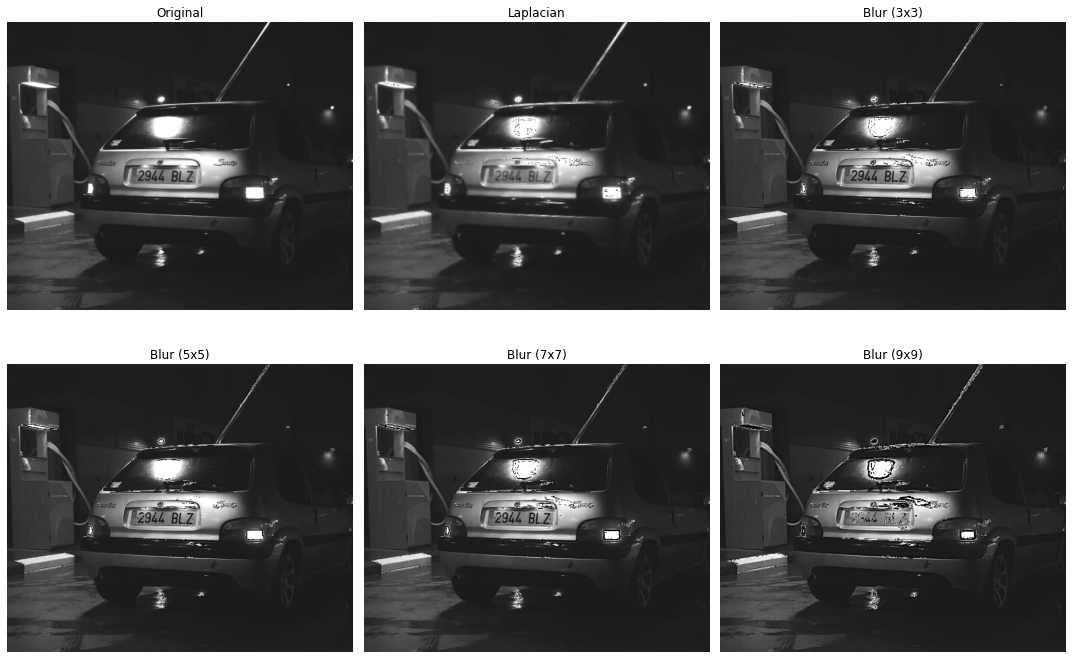


-------------------------------------
#    Car | A: 2
-------------------------------------


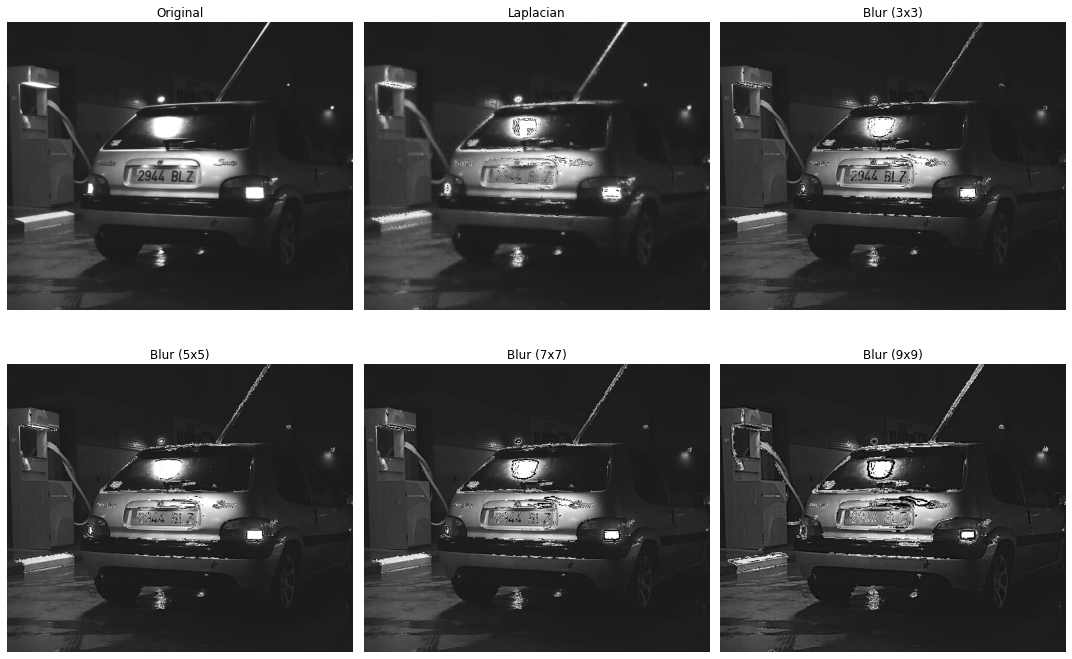


-------------------------------------
#    Moon | A: -2
-------------------------------------


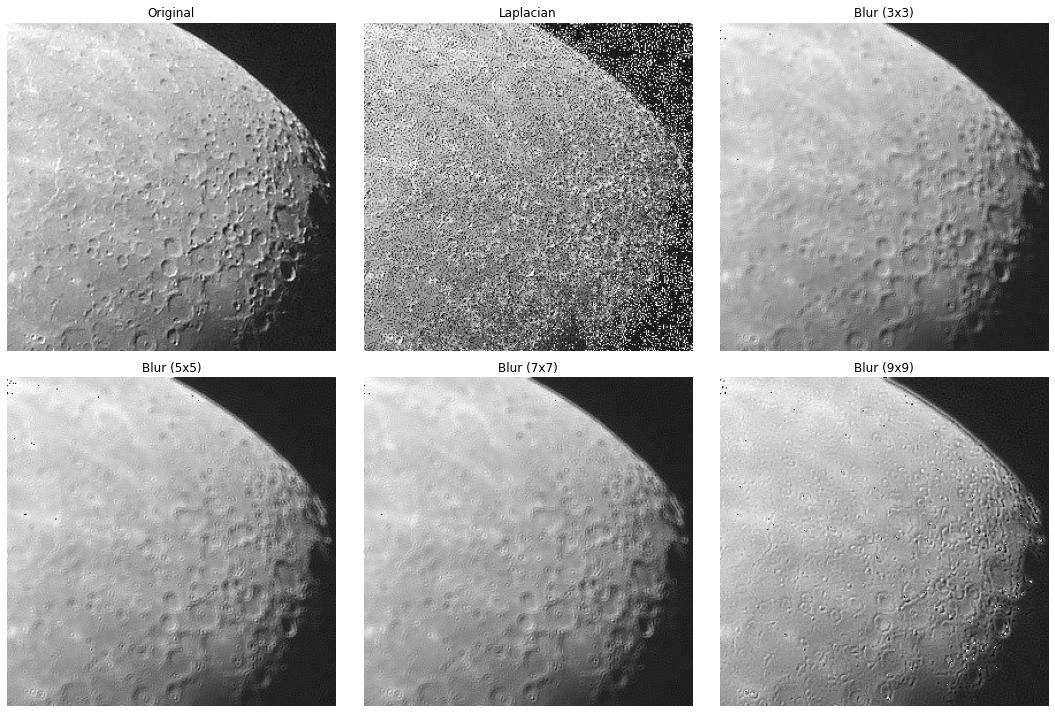


-------------------------------------
#    Moon | A: -1
-------------------------------------


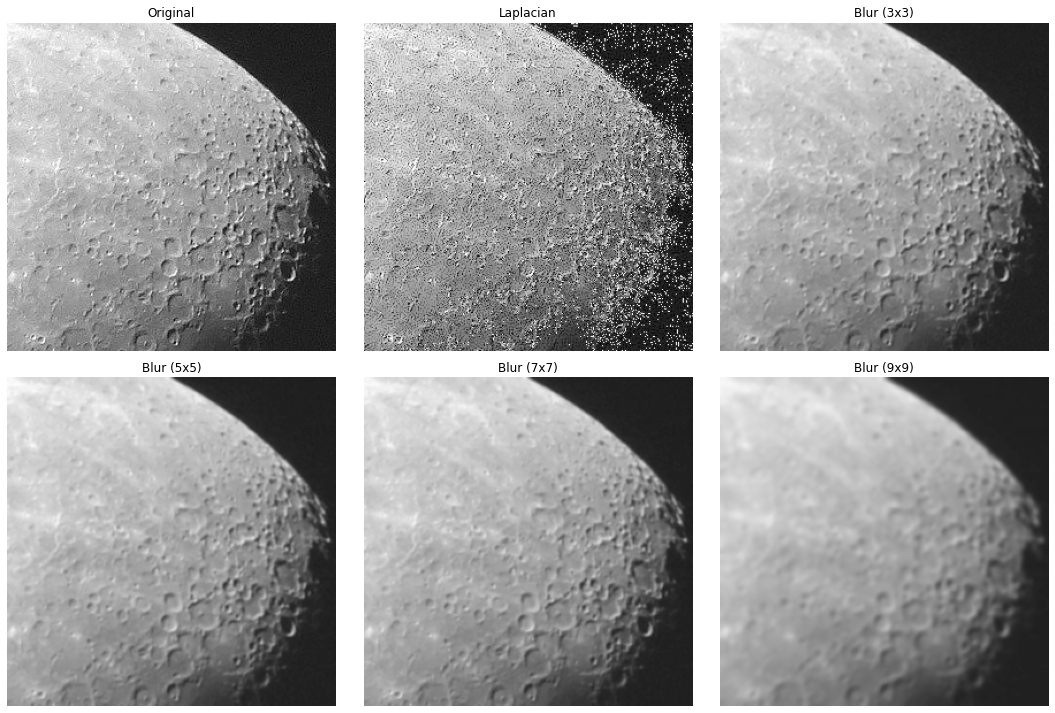


-------------------------------------
#    Moon | A: 1
-------------------------------------


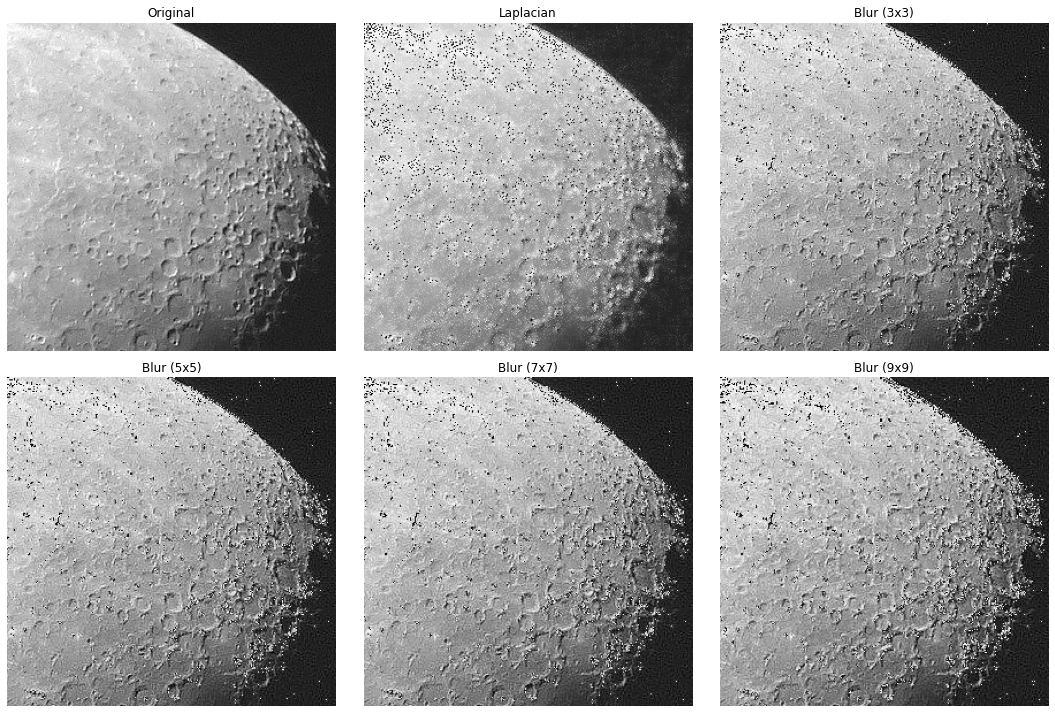


-------------------------------------
#    Moon | A: 2
-------------------------------------


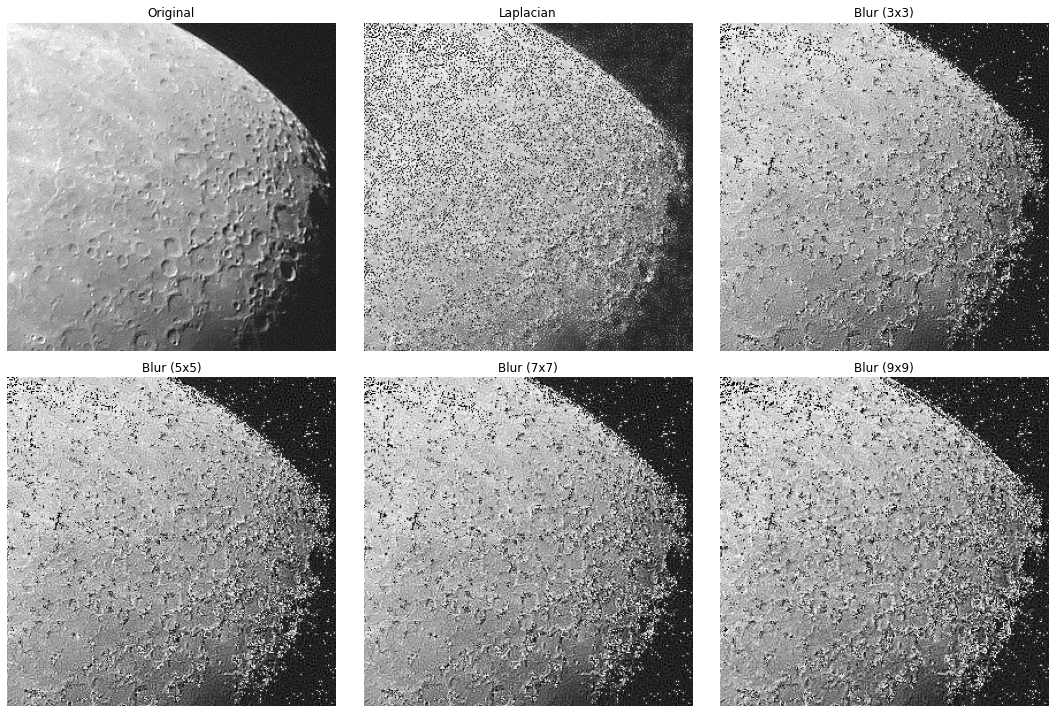

In [ ]:
img_arr = [car, moon]
img_caption = ["Car", "Moon"]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        print("\n-------------------------------------")
        print("#   ", img_caption[i], "| A:", A)
        print("-------------------------------------")

        fig = plt.figure(figsize=(15, 10))
        plot_frame(2, 3, 0, img_arr[i], "Original")

        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        plot_frame(2, 3, 1, tmp_img, "Laplacian")

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            plot_frame(2, 3, 2+j, tmp_img, "Blur (" + str(kernel_size) + "x" + str(kernel_size) + ")")
            j += 1
        
        fig.tight_layout()
        plt.show()

In [ ]:
your_observation = """
Negative A: tends to blurs the image, positive A: sharpens the image
A = -2 and A = 2 increase the extent of blurring and sharpening, respectively
A = 1 and A = -1 are more moderate operators

The laplacian works well to sharpen when A > 0
The 3x3 and 5x5 blur filters work better at sharpening compared to 7x7 and 9x9 filters (which distort the image more) when A > 0
"""

print(your_observation)


Negative A: tends to blurs the image, positive A: sharpens the image
A = -2 and A = 2 increase the extent of blurring and sharpening, respectively
A = 1 and A = -1 are more moderate operators

The laplacian works well to sharpen when A > 0
The 3x3 and 5x5 blur filters work better at sharpening compared to 7x7 and 9x9 filters (which distort the image more) when A > 0



In [ ]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

lap_img = []
blur_img = []

img_arr = [car, moon]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        lap_img.append(tmp_img)

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            blur_img.append(tmp_img)
            j += 1

gen_imgs = lap_img+blur_img
task3_submission = np.array(gen_imgs)